In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import torchvision.models as models
from collections import OrderedDict

import time
import pickle
import pandas
import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation
import scipy.stats as st


import W2reg_core as W2Rcore
import W2reg_misc as W2Rmisc


**Load pre-treated MNIST data.** 

The treatments make the predictions $y$ biased with respect to the variable $S$ (see the JMIV 2022 paper). 

In [2]:

[X_train,y_train,S_train,X_test,y_test,S_test]=W2Rmisc.Get_n_Treat_MNIST_srt()

#for i in range(0,5):
#  W2Rmisc.show_MNIST_image(i,X_train,y_train,S_train)


**Training phase with or without the W2 regulatization.**

In [3]:

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print('Device is',DEVICE)

Device is cuda:0


In [4]:
EPOCHS_in = 2
BATCH_SIZE_in = 200



#without regularisation

lambdavar_almost_0=0.0000000001  #visualisation of the evolution of W2 during the gradient descent will be impossible if lambdavar = 0

model_no_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - without reg')
Lists_Results_noreg=W2Rcore.W2R_fit(model_no_reg,X_train,y_train, S_train, lambdavar_almost_0, f_loss_attach=nn.BCELoss() , EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

#with regularisation

lambdavar=0.00001

model_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - with reg')
Lists_Results_reg=W2Rcore.W2R_fit(model_reg,X_train,y_train, S_train, lambdavar, f_loss_attach=nn.BCELoss(), EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)



Run training - without reg
epoch 0 -- batchNb 1: 0.6874344348907471 tensor(2.4335e-14, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 2: 0.704203724861145 tensor(6.5810e-14, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 3: 0.6557843089103699 tensor(1.0577e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 4: 0.663409948348999 tensor(2.0026e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 5: 0.6432671546936035 tensor(2.0309e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 6: 0.6147766709327698 tensor(3.2199e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 7: 0.6177595257759094 tensor(5.1149e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 8: 0.56803959608078 tensor(4.9608e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 9: 0.6096751093864441 tensor(4.8759e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 10: 0.5549364

epoch 0 -- batchNb 78: 0.220537468791008 tensor(8.2791e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 79: 0.23782990872859955 tensor(8.3675e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 80: 0.2207612246274948 tensor(3.0612e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 81: 0.12793958187103271 tensor(9.3086e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 82: 0.16832563281059265 tensor(4.5375e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 83: 0.16904371976852417 tensor(2.9406e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 84: 0.19762630760669708 tensor(3.0468e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 85: 0.145035058259964 tensor(1.7378e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 86: 0.1909981667995453 tensor(5.8154e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 87: 0.2723982632160187 t

epoch 0 -- batchNb 155: 0.15317881107330322 tensor(2.1436e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 156: 0.12412814050912857 tensor(2.0591e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 157: 0.16050978004932404 tensor(4.0095e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 158: 0.1595689058303833 tensor(3.4685e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 159: 0.14291660487651825 tensor(2.5997e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 160: 0.1940331906080246 tensor(4.5104e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 161: 0.11918939650058746 tensor(8.8094e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 162: 0.1503361612558365 tensor(9.1254e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 163: 0.232254758477211 tensor(7.5186e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 164: 0.1533062

epoch 0 -- batchNb 232: 0.12870176136493683 tensor(7.4590e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 233: 0.10486791282892227 tensor(6.6397e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 234: 0.09735585004091263 tensor(4.6905e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 235: 0.15136495232582092 tensor(6.9892e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 236: 0.1273605227470398 tensor(1.3297e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 237: 0.07428759336471558 tensor(5.3013e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 238: 0.10498213768005371 tensor(2.8194e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 239: 0.11242734640836716 tensor(2.3313e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 240: 0.11764608323574066 tensor(3.1706e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 0 -- batchNb 241: 0.099

epoch 1 -- batchNb 10: 0.0979728102684021 tensor(9.4607e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 11: 0.13274416327476501 tensor(7.4335e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 12: 0.11470233649015427 tensor(1.6460e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 13: 0.08569125831127167 tensor(5.7381e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 14: 0.08626192063093185 tensor(1.1813e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 15: 0.09480354934930801 tensor(1.1456e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 16: 0.10022919625043869 tensor(2.2260e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 17: 0.0667000561952591 tensor(8.5082e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 18: 0.12026698887348175 tensor(8.0353e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 19: 0.08665525168180

epoch 1 -- batchNb 87: 0.09150185436010361 tensor(3.0459e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 88: 0.06420817971229553 tensor(1.1351e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 89: 0.07063232362270355 tensor(1.8935e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 90: 0.1153927594423294 tensor(3.7750e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 91: 0.06904425472021103 tensor(7.8199e-13, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 92: 0.1037260890007019 tensor(9.1724e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 93: 0.051891665905714035 tensor(2.0047e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 94: 0.053985048085451126 tensor(7.4527e-12, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 95: 0.05067821592092514 tensor(1.1650e-11, grad_fn=<FairLossBackward>) --  lambda=1e-10
epoch 1 -- batchNb 96: 0.101462744176

epoch 0 -- batchNb 15: 0.5607192516326904 tensor(2.6698e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 16: 0.5324304103851318 tensor(5.4392e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 17: 0.5772966742515564 tensor(6.0827e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 18: 0.5393847823143005 tensor(1.3932e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 19: 0.5361805558204651 tensor(3.2017e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 20: 0.5108988881111145 tensor(4.5155e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 21: 0.5276373028755188 tensor(4.4823e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 22: 0.5153587460517883 tensor(5.5132e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 23: 0.4704613983631134 tensor(3.2857e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 24: 0.4676903188228607 tens

epoch 0 -- batchNb 93: 0.23847700655460358 tensor(3.1241e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 94: 0.23024748265743256 tensor(8.8211e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 95: 0.29169055819511414 tensor(2.7652e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 96: 0.2899848222732544 tensor(1.1649e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 97: 0.24836593866348267 tensor(1.0714e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 98: 0.19004957377910614 tensor(5.5643e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 99: 0.22101467847824097 tensor(1.2588e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 100: 0.2502829134464264 tensor(3.1609e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 101: 0.2686008810997009 tensor(7.8195e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 102: 0.232006728649

epoch 0 -- batchNb 170: 0.17037208378314972 tensor(1.7450e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 171: 0.18516641855239868 tensor(2.8427e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 172: 0.14753358066082 tensor(6.3631e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 173: 0.17969928681850433 tensor(1.1035e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 174: 0.20230168104171753 tensor(8.6086e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 175: 0.14849348366260529 tensor(6.0875e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 176: 0.18702907860279083 tensor(3.4674e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 177: 0.14919324219226837 tensor(3.8309e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 178: 0.21100538969039917 tensor(2.3885e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 179: 0.18124

epoch 0 -- batchNb 247: 0.14694154262542725 tensor(3.0964e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 248: 0.17734983563423157 tensor(4.1593e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 249: 0.0927206501364708 tensor(5.2381e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 250: 0.1461959034204483 tensor(4.4073e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 251: 0.20535093545913696 tensor(1.3275e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 252: 0.1143856942653656 tensor(1.4980e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 253: 0.1325264573097229 tensor(4.0389e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 254: 0.17382466793060303 tensor(8.7747e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 255: 0.18180054426193237 tensor(1.3414e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 0 -- batchNb 256: 0.139400

epoch 1 -- batchNb 25: 0.12769319117069244 tensor(3.1620e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 26: 0.1402779370546341 tensor(2.1672e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 27: 0.14956507086753845 tensor(5.2727e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 28: 0.11146426945924759 tensor(1.5302e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 29: 0.12887774407863617 tensor(1.0452e-06, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 30: 0.14108286798000336 tensor(1.7607e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 31: 0.13536608219146729 tensor(1.6850e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 32: 0.11972838640213013 tensor(1.9041e-06, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 33: 0.13576176762580872 tensor(5.5407e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 34: 0.1531217098236

epoch 1 -- batchNb 102: 0.11953186243772507 tensor(2.7567e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 103: 0.12023254483938217 tensor(8.3049e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 104: 0.15715402364730835 tensor(4.4731e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 105: 0.13507366180419922 tensor(6.1409e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 106: 0.17795392870903015 tensor(1.0285e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 107: 0.15326951444149017 tensor(1.3765e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 108: 0.1969677209854126 tensor(3.4024e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 109: 0.17939433455467224 tensor(9.0646e-08, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 110: 0.1494426429271698 tensor(2.3214e-07, grad_fn=<FairLossBackward>) --  lambda=1e-05
epoch 1 -- batchNb 111: 0.1860

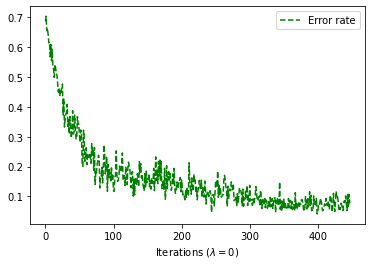

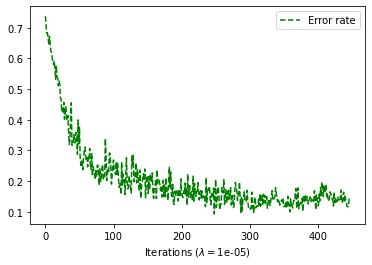

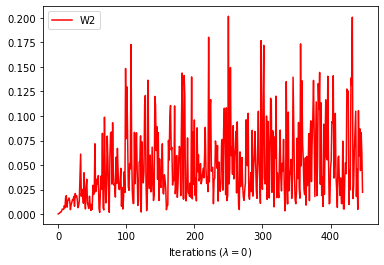

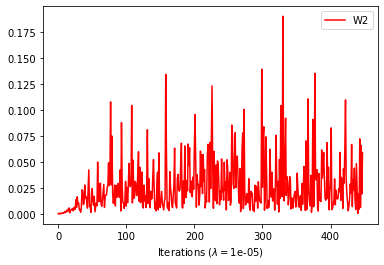

In [8]:
plt.figure()
plt.plot(Lists_Results_noreg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.savefig('Convergence_attach_noreg.pdf')


plt.figure()
plt.plot(Lists_Results_reg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_attach_'+str(lambdavar)+'.pdf')


plt.figure()
plt.plot(np.array(Lists_Results_noreg['W2'])/lambdavar_almost_0,'r-',label='W2')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.savefig('Convergence_regul_noreg.pdf')

plt.figure()
plt.plot(np.array(Lists_Results_reg['W2'])/lambdavar,'r-',label='W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_regul_'+str(lambdavar)+'.pdf')



**Tests - without regularisation**

In [9]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_no_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0381)
DI: 0.80992347343607
s0_RatioGoodPred: 0.8870903277378097
s1_RatioGoodPred: 0.9785828662930345


**Tests - with regularisation**

In [10]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0444)
DI: 0.9029331028227242
s0_RatioGoodPred: 0.9000799360511591
s1_RatioGoodPred: 0.9517614091273019
